In [1]:
import pandas as pd
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import copy
import matplotlib.pyplot as plt

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [3]:
data = pd.read_csv('Dataset/TC2/train.csv')

In [4]:
data

,velocity_data_x,velocity_data_y,velocity_data_z
0,-0.134012,0.466469,-0.051024
1,-0.202646,0.543844,-0.040844
2,-0.202646,0.543844,-0.040844
3,-0.267686,0.621683,-0.031170
4,-0.299013,0.660611,-0.026600
...,...,...,...
2943,-1.211667,0.883520,-0.000159
2944,-1.211675,0.883522,-0.000159
2945,-1.211683,0.883522,-0.000159
2946,-1.211691,0.883519,-0.000159


In [5]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

df_max_scaled = data.copy()
columns_to_scale = ['velocity_data_x', 'velocity_data_y', 'velocity_data_z']

scaler = MinMaxScaler()
for column in columns_to_scale:
    df_max_scaled[column] = scaler.fit_transform(np.array(df_max_scaled[column]).reshape(-1, 1) )
    
df_max_scaled

,velocity_data_x,velocity_data_y,velocity_data_z
0,0.987465,0.140303,0.000000
1,0.934934,0.193936,0.117364
2,0.934934,0.193936,0.117364
3,0.885153,0.247892,0.228894
4,0.861175,0.274875,0.281580
...,...,...,...
2943,0.162641,0.429388,0.586414
2944,0.162635,0.429389,0.586414
2945,0.162629,0.429389,0.586414
2946,0.162623,0.429387,0.586414


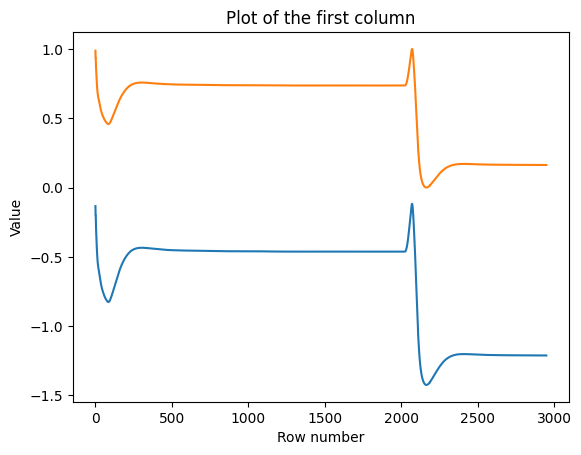

In [6]:
plt.plot(data['velocity_data_x'])
plt.plot(df_max_scaled['velocity_data_x'])

# Set labels for the axes
plt.xlabel('Row number')
plt.ylabel('Value')

# Set title for the plot
plt.title('Plot of the first column')

# Show the plot
plt.show()

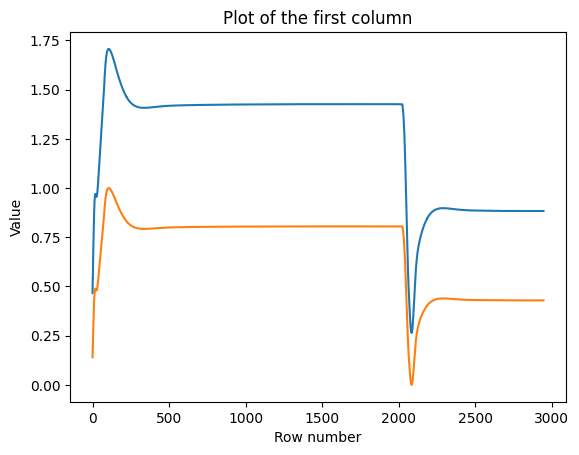

In [7]:
plt.plot(data['velocity_data_y'])
plt.plot(df_max_scaled['velocity_data_y'])

# Set labels for the axes
plt.xlabel('Row number')
plt.ylabel('Value')

# Set title for the plot
plt.title('Plot of the first column')

# Show the plot
plt.show()

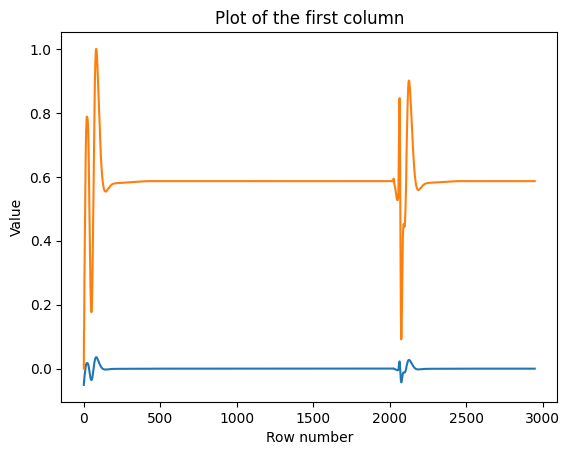

In [8]:
plt.plot(data['velocity_data_z'])
plt.plot(df_max_scaled['velocity_data_z'])

# Set labels for the axes
plt.xlabel('Row number')
plt.ylabel('Value')

# Set title for the plot
plt.title('Plot of the first column')

# Show the plot
plt.show()

In [9]:
sequence_size = 4
sequences = []

for i in range(len(data) - sequence_size + 1):
    sequence = data.iloc[i:i + sequence_size]
    sequences.append(sequence)

sequences_df = pd.concat(sequences, ignore_index=True)

sequences_df

,velocity_data_x,velocity_data_y,velocity_data_z
0,-0.134012,0.466469,-0.051024
1,-0.202646,0.543844,-0.040844
2,-0.202646,0.543844,-0.040844
3,-0.267686,0.621683,-0.031170
4,-0.202646,0.543844,-0.040844
...,...,...,...
11775,-1.211691,0.883519,-0.000159
11776,-1.211675,0.883522,-0.000159
11777,-1.211683,0.883522,-0.000159
11778,-1.211691,0.883519,-0.000159


In [10]:
x_train = sequences_df.values.tolist()
x_train

[[-0.134012, 0.466469, -0.051024],
 [-0.202646, 0.543844, -0.040844],
 [-0.202646, 0.543844, -0.040844],
 [-0.267686, 0.621683, -0.03117],
 [-0.202646, 0.543844, -0.040844],
 [-0.202646, 0.543844, -0.040844],
 [-0.267686, 0.621683, -0.03117],
 [-0.299013, 0.660611, -0.0266],
 [-0.202646, 0.543844, -0.040844],
 [-0.267686, 0.621683, -0.03117],
 [-0.299013, 0.660611, -0.0266],
 [-0.329513, 0.699309, -0.022177],
 [-0.267686, 0.621683, -0.03117],
 [-0.299013, 0.660611, -0.0266],
 [-0.329513, 0.699309, -0.022177],
 [-0.359074, 0.737451, -0.0179],
 [-0.299013, 0.660611, -0.0266],
 [-0.329513, 0.699309, -0.022177],
 [-0.359074, 0.737451, -0.0179],
 [-0.387509, 0.774519, -0.013663],
 [-0.329513, 0.699309, -0.022177],
 [-0.359074, 0.737451, -0.0179],
 [-0.387509, 0.774519, -0.013663],
 [-0.414533, 0.809782, -0.009355],
 [-0.359074, 0.737451, -0.0179],
 [-0.387509, 0.774519, -0.013663],
 [-0.414533, 0.809782, -0.009355],
 [-0.439797, 0.842406, -0.005043],
 [-0.387509, 0.774519, -0.013663],
 [-0.

In [17]:
input_size = 3
dropout = 0.1
num_layers=1
hidden_size=64
num_epochs=50
learning_rate=0.01

In [18]:
class Model(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, dropout):
        super(Model, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')  # Determine device
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, bias=True, batch_first=True, dropout=dropout, bidirectional=True).to(self.device)  # Move LSTM to device
        self.fc_1 = nn.Linear(hidden_size * 2, 128).to(self.device)  # Move Linear layers to device
        self.relu1 = nn.ReLU()
        self.fc_2 = nn.Linear(128, input_size).to(self.device)
        self._init_weights()

    def forward(self, x):
        h0 = torch.zeros(self.num_layers * 2, self.hidden_size).to(self.device)  # Move initial states to device
        c0 = torch.zeros(self.num_layers * 2, self.hidden_size).to(self.device)

        out, _ = self.rnn(x, (h0))
        out = self.fc_1(out)
        out = self.relu1(out)
        out = self.fc_2(out)

        return out

    def _init_weights(self):
        for layer in [self.rnn, self.fc_1, self.fc_2]:
            if isinstance(layer, nn.Linear):
                nn.init.kaiming_normal_(layer.weight, nonlinearity='relu')
                nn.init.zeros_(layer.bias)
            elif isinstance(layer, nn.RNN):
                for name, param in layer.named_parameters():
                    if 'weight_ih' in name or 'weight_hh' in name:
                        nn.init.kaiming_normal_(param.data, nonlinearity='relu')
                    elif 'bias' in name:
                        nn.init.zeros_(param.data)

In [19]:
model = Model(input_size, hidden_size, num_layers, dropout)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [20]:
model.to(device)
model.train()

Model(
  (rnn): RNN(3, 64, batch_first=True, dropout=0.1, bidirectional=True)
  (fc_1): Linear(in_features=128, out_features=128, bias=True)
  (relu1): ReLU()
  (fc_2): Linear(in_features=128, out_features=3, bias=True)
)

In [21]:
predicted_vectors = []

last_index = len(x_train) - 4
num_sequences = last_index // 4

for epoch in range(num_epochs):
    predicted_vectors.clear()
    total_loss = 0
    
    for idx in range(0, last_index, 4):
        sequence = torch.tensor(x_train[idx: idx + 4]).to(device)  
        optimizer.zero_grad()

        out_forward = model(sequence)
        predicted_next_element_1 = out_forward[-1, :].view(-1, 3)
        target_next_element = torch.tensor(x_train[idx + 7]).view(-1, 3).to(device)

        loss_forward_1 = criterion(predicted_next_element_1, target_next_element)
        total_loss += loss_forward_1.item()
        
        loss_forward_1.backward()
        optimizer.step()

        if idx % 100 == 0:
            print(f"Epoch {epoch + 1}/{num_epochs}, Sequence {idx // 4 + 1}/{num_sequences}, Loss: {loss_forward_1.item()}")

        predicted_vectors.append(predicted_next_element_1.detach().cpu().numpy())

    avg_loss = total_loss / num_sequences

    

Epoch 1/50, Sequence 1/2944, Loss: 1.191043734550476
Epoch 1/50, Sequence 26/2944, Loss: 0.011015634052455425
Epoch 1/50, Sequence 51/2944, Loss: 0.0002488097525201738
Epoch 1/50, Sequence 76/2944, Loss: 5.00797905260697e-05
Epoch 1/50, Sequence 101/2944, Loss: 4.603094566846266e-06
Epoch 1/50, Sequence 126/2944, Loss: 1.1448881878095563e-06
Epoch 1/50, Sequence 151/2944, Loss: 1.3575272532762028e-06
Epoch 1/50, Sequence 176/2944, Loss: 8.120893824070663e-08
Epoch 1/50, Sequence 201/2944, Loss: 6.808644315015044e-08
Epoch 1/50, Sequence 226/2944, Loss: 3.358485400895006e-07
Epoch 1/50, Sequence 251/2944, Loss: 3.6021098992478073e-08
Epoch 1/50, Sequence 276/2944, Loss: 3.130071979384752e-09
Epoch 1/50, Sequence 301/2944, Loss: 7.172948346401142e-11
Epoch 1/50, Sequence 326/2944, Loss: 1.6708323613556786e-09
Epoch 1/50, Sequence 351/2944, Loss: 1.0018037788217526e-10
Epoch 1/50, Sequence 376/2944, Loss: 2.8955970954314125e-09
Epoch 1/50, Sequence 401/2944, Loss: 2.331508042185959e-10
Ep

Epoch 2/50, Sequence 476/2944, Loss: 2.9902766374156897e-10
Epoch 2/50, Sequence 501/2944, Loss: 3.015175956133653e-11
Epoch 2/50, Sequence 526/2944, Loss: 6.913873987213215e-12
Epoch 2/50, Sequence 551/2944, Loss: 1.2884715516747747e-10
Epoch 2/50, Sequence 576/2944, Loss: 5.251000372366588e-13
Epoch 2/50, Sequence 601/2944, Loss: 5.5176150107194566e-12
Epoch 2/50, Sequence 626/2944, Loss: 2.604621518464967e-10
Epoch 2/50, Sequence 651/2944, Loss: 1.390166107229085e-11
Epoch 2/50, Sequence 676/2944, Loss: 2.247615722011931e-12
Epoch 2/50, Sequence 701/2944, Loss: 1.2723773423761742e-11
Epoch 2/50, Sequence 726/2944, Loss: 2.7512868285700653e-12
Epoch 2/50, Sequence 751/2944, Loss: 1.2624321726883991e-11
Epoch 2/50, Sequence 776/2944, Loss: 1.0224756458176998e-10
Epoch 2/50, Sequence 801/2944, Loss: 1.4858621277813455e-11
Epoch 2/50, Sequence 826/2944, Loss: 5.385649391731473e-12
Epoch 2/50, Sequence 851/2944, Loss: 1.2192109821729247e-10
Epoch 2/50, Sequence 876/2944, Loss: 8.16146455

Epoch 3/50, Sequence 951/2944, Loss: 2.6409932019078042e-08
Epoch 3/50, Sequence 976/2944, Loss: 4.183511315147825e-09
Epoch 3/50, Sequence 1001/2944, Loss: 9.452759408556943e-11
Epoch 3/50, Sequence 1026/2944, Loss: 2.7073988884129818e-11
Epoch 3/50, Sequence 1051/2944, Loss: 4.73531873435018e-11
Epoch 3/50, Sequence 1076/2944, Loss: 3.4336520293720696e-09
Epoch 3/50, Sequence 1101/2944, Loss: 0.00017224528710357845
Epoch 3/50, Sequence 1126/2944, Loss: 5.8602221542969346e-05
Epoch 3/50, Sequence 1151/2944, Loss: 2.8057675081072375e-06
Epoch 3/50, Sequence 1176/2944, Loss: 2.383166020081262e-07
Epoch 3/50, Sequence 1201/2944, Loss: 1.785223346928433e-08
Epoch 3/50, Sequence 1226/2944, Loss: 1.699183349579414e-09
Epoch 3/50, Sequence 1251/2944, Loss: 2.1498405833320078e-10
Epoch 3/50, Sequence 1276/2944, Loss: 1.0611058472859147e-12
Epoch 3/50, Sequence 1301/2944, Loss: 3.838365389419174e-12
Epoch 3/50, Sequence 1326/2944, Loss: 2.986851599384721e-10
Epoch 3/50, Sequence 1351/2944, Los

Epoch 4/50, Sequence 1451/2944, Loss: 6.760955944401514e-12
Epoch 4/50, Sequence 1476/2944, Loss: 2.1606718150768423e-12
Epoch 4/50, Sequence 1501/2944, Loss: 2.287594766392509e-11
Epoch 4/50, Sequence 1526/2944, Loss: 5.2131320094073175e-12
Epoch 4/50, Sequence 1551/2944, Loss: 5.222897635215329e-12
Epoch 4/50, Sequence 1576/2944, Loss: 8.933437323221938e-11
Epoch 4/50, Sequence 1601/2944, Loss: 3.127762588858718e-12
Epoch 4/50, Sequence 1626/2944, Loss: 4.175285117646865e-12
Epoch 4/50, Sequence 1651/2944, Loss: 1.2868891716144581e-11
Epoch 4/50, Sequence 1676/2944, Loss: 1.3002574277692913e-12
Epoch 4/50, Sequence 1701/2944, Loss: 1.9524039503171498e-12
Epoch 4/50, Sequence 1726/2944, Loss: 7.694928028101344e-11
Epoch 4/50, Sequence 1751/2944, Loss: 6.659560923549801e-12
Epoch 4/50, Sequence 1776/2944, Loss: 1.3561698639086295e-11
Epoch 4/50, Sequence 1801/2944, Loss: 1.80651552744715e-11
Epoch 4/50, Sequence 1826/2944, Loss: 7.613309288556636e-12
Epoch 4/50, Sequence 1851/2944, Los

Epoch 5/50, Sequence 1951/2944, Loss: 9.647874166240911e-11
Epoch 5/50, Sequence 1976/2944, Loss: 1.992425668895237e-11
Epoch 5/50, Sequence 2001/2944, Loss: 2.8195737411529365e-10
Epoch 5/50, Sequence 2026/2944, Loss: 2.4160759494407102e-05
Epoch 5/50, Sequence 2051/2944, Loss: 2.7992267860099673e-05
Epoch 5/50, Sequence 2076/2944, Loss: 0.0001712818630039692
Epoch 5/50, Sequence 2101/2944, Loss: 9.120007234741934e-06
Epoch 5/50, Sequence 2126/2944, Loss: 2.2697333406540565e-05
Epoch 5/50, Sequence 2151/2944, Loss: 5.255560154182604e-06
Epoch 5/50, Sequence 2176/2944, Loss: 5.186852831684519e-07
Epoch 5/50, Sequence 2201/2944, Loss: 3.2618197565170703e-06
Epoch 5/50, Sequence 2226/2944, Loss: 3.418080041228677e-08
Epoch 5/50, Sequence 2251/2944, Loss: 2.547044886114236e-08
Epoch 5/50, Sequence 2276/2944, Loss: 8.081209671217948e-06
Epoch 5/50, Sequence 2301/2944, Loss: 1.6891613086045254e-07
Epoch 5/50, Sequence 2326/2944, Loss: 3.4658178549307195e-09
Epoch 5/50, Sequence 2351/2944, L

Epoch 6/50, Sequence 2451/2944, Loss: 1.049835704480806e-10
Epoch 6/50, Sequence 2476/2944, Loss: 6.974136546045173e-12
Epoch 6/50, Sequence 2501/2944, Loss: 3.768969136785927e-09
Epoch 6/50, Sequence 2526/2944, Loss: 2.226345496847415e-10
Epoch 6/50, Sequence 2551/2944, Loss: 2.4836943265937883e-11
Epoch 6/50, Sequence 2576/2944, Loss: 2.440352607491203e-12
Epoch 6/50, Sequence 2601/2944, Loss: 4.668785497097261e-11
Epoch 6/50, Sequence 2626/2944, Loss: 1.1583317638397261e-11
Epoch 6/50, Sequence 2651/2944, Loss: 6.471401539642763e-12
Epoch 6/50, Sequence 2676/2944, Loss: 1.059269269521046e-10
Epoch 6/50, Sequence 2701/2944, Loss: 2.313013279173215e-12
Epoch 6/50, Sequence 2726/2944, Loss: 6.733029411787328e-11
Epoch 6/50, Sequence 2751/2944, Loss: 2.194817591560927e-11
Epoch 6/50, Sequence 2776/2944, Loss: 5.599186912730314e-12
Epoch 6/50, Sequence 2801/2944, Loss: 5.167587278226415e-13
Epoch 6/50, Sequence 2826/2944, Loss: 3.26989390425636e-12
Epoch 6/50, Sequence 2851/2944, Loss: 1

Epoch 8/50, Sequence 1/2944, Loss: 0.2417486608028412
Epoch 8/50, Sequence 26/2944, Loss: 0.002395928604528308
Epoch 8/50, Sequence 51/2944, Loss: 0.00012997249723412097
Epoch 8/50, Sequence 76/2944, Loss: 9.227164264302701e-05
Epoch 8/50, Sequence 101/2944, Loss: 2.639807235027547e-06
Epoch 8/50, Sequence 126/2944, Loss: 1.7453870668759919e-06
Epoch 8/50, Sequence 151/2944, Loss: 3.2332468435924966e-06
Epoch 8/50, Sequence 176/2944, Loss: 5.068165478405717e-07
Epoch 8/50, Sequence 201/2944, Loss: 1.4733487319062988e-07
Epoch 8/50, Sequence 226/2944, Loss: 3.529148173697649e-08
Epoch 8/50, Sequence 251/2944, Loss: 8.833593412305163e-09
Epoch 8/50, Sequence 276/2944, Loss: 1.523338122311202e-09
Epoch 8/50, Sequence 301/2944, Loss: 3.24905502502304e-09
Epoch 8/50, Sequence 326/2944, Loss: 3.975285878254908e-09
Epoch 8/50, Sequence 351/2944, Loss: 4.910121198520301e-09
Epoch 8/50, Sequence 376/2944, Loss: 1.3685663269313864e-08
Epoch 8/50, Sequence 401/2944, Loss: 3.35969341236364e-09
Epo

Epoch 9/50, Sequence 501/2944, Loss: 8.508062310230713e-11
Epoch 9/50, Sequence 526/2944, Loss: 8.910161497510671e-11
Epoch 9/50, Sequence 551/2944, Loss: 3.1498328251222674e-11
Epoch 9/50, Sequence 576/2944, Loss: 2.1188014884265804e-11
Epoch 9/50, Sequence 601/2944, Loss: 1.834772611619684e-11
Epoch 9/50, Sequence 626/2944, Loss: 3.5789416569231847e-11
Epoch 9/50, Sequence 651/2944, Loss: 3.3068075187825396e-12
Epoch 9/50, Sequence 676/2944, Loss: 1.7537080728574628e-12
Epoch 9/50, Sequence 701/2944, Loss: 5.401362408556654e-13
Epoch 9/50, Sequence 726/2944, Loss: 2.7636712363054983e-12
Epoch 9/50, Sequence 751/2944, Loss: 8.294474482251069e-12
Epoch 9/50, Sequence 776/2944, Loss: 1.1149233446194895e-11
Epoch 9/50, Sequence 801/2944, Loss: 2.6679908282645215e-11
Epoch 9/50, Sequence 826/2944, Loss: 4.1911762255208984e-11
Epoch 9/50, Sequence 851/2944, Loss: 2.5561188582434724e-11
Epoch 9/50, Sequence 876/2944, Loss: 1.8850808067294444e-11
Epoch 9/50, Sequence 901/2944, Loss: 7.229761

Epoch 10/50, Sequence 1001/2944, Loss: 3.3442378640641257e-12
Epoch 10/50, Sequence 1026/2944, Loss: 7.638991002256734e-12
Epoch 10/50, Sequence 1051/2944, Loss: 2.1696574658419676e-12
Epoch 10/50, Sequence 1076/2944, Loss: 3.0188746467929573e-12
Epoch 10/50, Sequence 1101/2944, Loss: 4.226287028674669e-11
Epoch 10/50, Sequence 1126/2944, Loss: 1.2945975671682652e-12
Epoch 10/50, Sequence 1151/2944, Loss: 6.962457411822942e-13
Epoch 10/50, Sequence 1176/2944, Loss: 1.0088036309086057e-11
Epoch 10/50, Sequence 1201/2944, Loss: 7.8902891165189e-12
Epoch 10/50, Sequence 1226/2944, Loss: 4.84237996922765e-12
Epoch 10/50, Sequence 1251/2944, Loss: 4.5919695129681415e-11
Epoch 10/50, Sequence 1276/2944, Loss: 9.083839908573255e-13
Epoch 10/50, Sequence 1301/2944, Loss: 1.894392845716575e-12
Epoch 10/50, Sequence 1326/2944, Loss: 5.2177866194380584e-11
Epoch 10/50, Sequence 1351/2944, Loss: 2.4940353601787812e-12
Epoch 10/50, Sequence 1376/2944, Loss: 7.993531509452312e-13
Epoch 10/50, Sequen

Epoch 11/50, Sequence 1451/2944, Loss: 2.3804241997688047e-12
Epoch 11/50, Sequence 1476/2944, Loss: 1.6469745218235937e-13
Epoch 11/50, Sequence 1501/2944, Loss: 2.6547087011302706e-12
Epoch 11/50, Sequence 1526/2944, Loss: 9.840130012900294e-13
Epoch 11/50, Sequence 1551/2944, Loss: 4.9296617135596854e-12
Epoch 11/50, Sequence 1576/2944, Loss: 2.139960951497155e-11
Epoch 11/50, Sequence 1601/2944, Loss: 4.5086845498407135e-13
Epoch 11/50, Sequence 1626/2944, Loss: 5.075481267907689e-12
Epoch 11/50, Sequence 1651/2944, Loss: 2.051427170496334e-12
Epoch 11/50, Sequence 1676/2944, Loss: 2.95781172991727e-12
Epoch 11/50, Sequence 1701/2944, Loss: 3.0650427942230385e-13
Epoch 11/50, Sequence 1726/2944, Loss: 2.0094242242363336e-11
Epoch 11/50, Sequence 1751/2944, Loss: 6.4622083725818236e-12
Epoch 11/50, Sequence 1776/2944, Loss: 2.78784243953889e-12
Epoch 11/50, Sequence 1801/2944, Loss: 1.177388742057417e-11
Epoch 11/50, Sequence 1826/2944, Loss: 1.4911336054801438e-12
Epoch 11/50, Sequ

Epoch 12/50, Sequence 1901/2944, Loss: 1.450743518371933e-11
Epoch 12/50, Sequence 1926/2944, Loss: 4.308353673820875e-11
Epoch 12/50, Sequence 1951/2944, Loss: 4.80809524139314e-11
Epoch 12/50, Sequence 1976/2944, Loss: 5.840460337580566e-10
Epoch 12/50, Sequence 2001/2944, Loss: 2.2239912689236974e-10
Epoch 12/50, Sequence 2026/2944, Loss: 9.326204235549085e-07
Epoch 12/50, Sequence 2051/2944, Loss: 3.087124787271023e-05
Epoch 12/50, Sequence 2076/2944, Loss: 0.007513371296226978
Epoch 12/50, Sequence 2101/2944, Loss: 0.013998727314174175
Epoch 12/50, Sequence 2126/2944, Loss: 0.00020753196440637112
Epoch 12/50, Sequence 2151/2944, Loss: 0.00014739690232090652
Epoch 12/50, Sequence 2176/2944, Loss: 2.0164279703749344e-06
Epoch 12/50, Sequence 2201/2944, Loss: 4.704479579231702e-06
Epoch 12/50, Sequence 2226/2944, Loss: 7.296877356566256e-06
Epoch 12/50, Sequence 2251/2944, Loss: 3.473313654467347e-06
Epoch 12/50, Sequence 2276/2944, Loss: 1.5110658750927541e-06
Epoch 12/50, Sequence 

Epoch 13/50, Sequence 2351/2944, Loss: 1.0135076422557177e-07
Epoch 13/50, Sequence 2376/2944, Loss: 4.955623134073051e-10
Epoch 13/50, Sequence 2401/2944, Loss: 6.845312094938549e-10
Epoch 13/50, Sequence 2426/2944, Loss: 1.5766686567442179e-10
Epoch 13/50, Sequence 2451/2944, Loss: 1.4115050794849537e-10
Epoch 13/50, Sequence 2476/2944, Loss: 4.755564431829784e-12
Epoch 13/50, Sequence 2501/2944, Loss: 2.466689963398494e-09
Epoch 13/50, Sequence 2526/2944, Loss: 1.0138951900273696e-09
Epoch 13/50, Sequence 2551/2944, Loss: 5.1411579854443445e-11
Epoch 13/50, Sequence 2576/2944, Loss: 1.3327302803012309e-11
Epoch 13/50, Sequence 2601/2944, Loss: 9.026598045414058e-12
Epoch 13/50, Sequence 2626/2944, Loss: 1.2943527326336746e-11
Epoch 13/50, Sequence 2651/2944, Loss: 6.187674938401555e-12
Epoch 13/50, Sequence 2676/2944, Loss: 9.794515025418615e-12
Epoch 13/50, Sequence 2701/2944, Loss: 7.814383688742321e-12
Epoch 13/50, Sequence 2726/2944, Loss: 4.5644266144506673e-11
Epoch 13/50, Seq

Epoch 14/50, Sequence 2801/2944, Loss: 1.3835900307401783e-11
Epoch 14/50, Sequence 2826/2944, Loss: 3.3792261523724054e-12
Epoch 14/50, Sequence 2851/2944, Loss: 1.3671386939195784e-11
Epoch 14/50, Sequence 2876/2944, Loss: 2.634393354503106e-12
Epoch 14/50, Sequence 2901/2944, Loss: 1.3595099004892752e-11
Epoch 14/50, Sequence 2926/2944, Loss: 1.3627887338572842e-13
Epoch 15/50, Sequence 1/2944, Loss: 0.16675406694412231
Epoch 15/50, Sequence 26/2944, Loss: 0.010041571222245693
Epoch 15/50, Sequence 51/2944, Loss: 0.0009269199217669666
Epoch 15/50, Sequence 76/2944, Loss: 5.419169247034006e-05
Epoch 15/50, Sequence 101/2944, Loss: 6.885528591737966e-07
Epoch 15/50, Sequence 126/2944, Loss: 1.1267385389146511e-06
Epoch 15/50, Sequence 151/2944, Loss: 1.208248704642756e-06
Epoch 15/50, Sequence 176/2944, Loss: 1.8420726064505288e-06
Epoch 15/50, Sequence 201/2944, Loss: 5.389858301896311e-07
Epoch 15/50, Sequence 226/2944, Loss: 9.126486233412834e-09
Epoch 15/50, Sequence 251/2944, Los

Epoch 16/50, Sequence 301/2944, Loss: 3.820848082369821e-10
Epoch 16/50, Sequence 326/2944, Loss: 1.174437214146451e-10
Epoch 16/50, Sequence 351/2944, Loss: 7.87056420037402e-10
Epoch 16/50, Sequence 376/2944, Loss: 5.534528391137883e-09
Epoch 16/50, Sequence 401/2944, Loss: 3.409600102255439e-10
Epoch 16/50, Sequence 426/2944, Loss: 2.7915467160077867e-10
Epoch 16/50, Sequence 451/2944, Loss: 4.954571863891033e-09
Epoch 16/50, Sequence 476/2944, Loss: 6.1996094022354065e-12
Epoch 16/50, Sequence 501/2944, Loss: 4.887248244989095e-11
Epoch 16/50, Sequence 526/2944, Loss: 7.402940066514319e-11
Epoch 16/50, Sequence 551/2944, Loss: 2.3759350042951155e-10
Epoch 16/50, Sequence 576/2944, Loss: 1.7608640240363016e-11
Epoch 16/50, Sequence 601/2944, Loss: 1.8412405280998634e-11
Epoch 16/50, Sequence 626/2944, Loss: 8.996511868808454e-11
Epoch 16/50, Sequence 651/2944, Loss: 5.363652230694349e-12
Epoch 16/50, Sequence 676/2944, Loss: 8.936391557301526e-12
Epoch 16/50, Sequence 701/2944, Loss

Epoch 17/50, Sequence 751/2944, Loss: 1.393867105070612e-10
Epoch 17/50, Sequence 776/2944, Loss: 1.1316460268862016e-10
Epoch 17/50, Sequence 801/2944, Loss: 2.157763412391489e-10
Epoch 17/50, Sequence 826/2944, Loss: 4.0332981399160417e-10
Epoch 17/50, Sequence 851/2944, Loss: 7.952463132454568e-10
Epoch 17/50, Sequence 876/2944, Loss: 7.20331155834586e-11
Epoch 17/50, Sequence 901/2944, Loss: 2.4551775543169008e-11
Epoch 17/50, Sequence 926/2944, Loss: 1.4815196595560631e-12
Epoch 17/50, Sequence 951/2944, Loss: 4.5371768408325464e-13
Epoch 17/50, Sequence 976/2944, Loss: 4.015086874087359e-12
Epoch 17/50, Sequence 1001/2944, Loss: 1.03982092033994e-11
Epoch 17/50, Sequence 1026/2944, Loss: 3.439951795636276e-11
Epoch 17/50, Sequence 1051/2944, Loss: 4.8867285218356926e-11
Epoch 17/50, Sequence 1076/2944, Loss: 6.643360861424696e-11
Epoch 17/50, Sequence 1101/2944, Loss: 1.1114442005633052e-10
Epoch 17/50, Sequence 1126/2944, Loss: 1.0922079907160764e-10
Epoch 17/50, Sequence 1151/2

Epoch 18/50, Sequence 1201/2944, Loss: 2.0940268963265396e-10
Epoch 18/50, Sequence 1226/2944, Loss: 2.3701689916277857e-11
Epoch 18/50, Sequence 1251/2944, Loss: 1.3611971549920554e-09
Epoch 18/50, Sequence 1276/2944, Loss: 5.927026230923005e-11
Epoch 18/50, Sequence 1301/2944, Loss: 3.9329195455906074e-10
Epoch 18/50, Sequence 1326/2944, Loss: 1.8430409975955797e-11
Epoch 18/50, Sequence 1351/2944, Loss: 4.987582569171423e-10
Epoch 18/50, Sequence 1376/2944, Loss: 9.350403264163365e-12
Epoch 18/50, Sequence 1401/2944, Loss: 3.8358213827471843e-10
Epoch 18/50, Sequence 1426/2944, Loss: 2.531492203361463e-11
Epoch 18/50, Sequence 1451/2944, Loss: 8.146863739177945e-11
Epoch 18/50, Sequence 1476/2944, Loss: 1.44759464831834e-11
Epoch 18/50, Sequence 1501/2944, Loss: 8.462646139406615e-10
Epoch 18/50, Sequence 1526/2944, Loss: 1.65747623959156e-11
Epoch 18/50, Sequence 1551/2944, Loss: 1.161286400375161e-09
Epoch 18/50, Sequence 1576/2944, Loss: 8.570496395909899e-11
Epoch 18/50, Sequenc

Epoch 19/50, Sequence 1651/2944, Loss: 5.5248208785663167e-11
Epoch 19/50, Sequence 1676/2944, Loss: 3.2674201122517843e-09
Epoch 19/50, Sequence 1701/2944, Loss: 2.1024189056362275e-09
Epoch 19/50, Sequence 1726/2944, Loss: 1.5806564390707933e-10
Epoch 19/50, Sequence 1751/2944, Loss: 6.261664797779787e-11
Epoch 19/50, Sequence 1776/2944, Loss: 1.4558172722889395e-10
Epoch 19/50, Sequence 1801/2944, Loss: 1.435127156002025e-10
Epoch 19/50, Sequence 1826/2944, Loss: 9.068330530936919e-10
Epoch 19/50, Sequence 1851/2944, Loss: 5.489756566001702e-11
Epoch 19/50, Sequence 1876/2944, Loss: 2.4411863641660148e-09
Epoch 19/50, Sequence 1901/2944, Loss: 2.1197954502838456e-09
Epoch 19/50, Sequence 1926/2944, Loss: 7.741427637819598e-11
Epoch 19/50, Sequence 1951/2944, Loss: 4.65604187149804e-11
Epoch 19/50, Sequence 1976/2944, Loss: 3.4313097068555676e-12
Epoch 19/50, Sequence 2001/2944, Loss: 3.0356595709379874e-11
Epoch 19/50, Sequence 2026/2944, Loss: 0.00010271788050886244
Epoch 19/50, Se

Epoch 20/50, Sequence 2101/2944, Loss: 0.0023453820031136274
Epoch 20/50, Sequence 2126/2944, Loss: 0.00015884169260971248
Epoch 20/50, Sequence 2151/2944, Loss: 1.434168552805204e-06
Epoch 20/50, Sequence 2176/2944, Loss: 1.1914607966900803e-07
Epoch 20/50, Sequence 2201/2944, Loss: 3.1353616236629023e-07
Epoch 20/50, Sequence 2226/2944, Loss: 1.7928365991792816e-07
Epoch 20/50, Sequence 2251/2944, Loss: 4.6801652331396326e-08
Epoch 20/50, Sequence 2276/2944, Loss: 1.0156952612305759e-07
Epoch 20/50, Sequence 2301/2944, Loss: 4.571862177726871e-08
Epoch 20/50, Sequence 2326/2944, Loss: 2.3909108026742842e-09
Epoch 20/50, Sequence 2351/2944, Loss: 3.5160176992121706e-08
Epoch 20/50, Sequence 2376/2944, Loss: 1.6903542454649312e-10
Epoch 20/50, Sequence 2401/2944, Loss: 6.618645735645412e-12
Epoch 20/50, Sequence 2426/2944, Loss: 1.3602330199702362e-11
Epoch 20/50, Sequence 2451/2944, Loss: 1.8689091940693459e-10
Epoch 20/50, Sequence 2476/2944, Loss: 3.5392778985343654e-11
Epoch 20/50,

Epoch 21/50, Sequence 2551/2944, Loss: 3.807821835621894e-10
Epoch 21/50, Sequence 2576/2944, Loss: 1.814118633092221e-09
Epoch 21/50, Sequence 2601/2944, Loss: 1.5890424531761482e-09
Epoch 21/50, Sequence 2626/2944, Loss: 2.2913488884057642e-09
Epoch 21/50, Sequence 2651/2944, Loss: 2.872784232721415e-09
Epoch 21/50, Sequence 2676/2944, Loss: 6.98056057402141e-11
Epoch 21/50, Sequence 2701/2944, Loss: 2.5528077915448755e-11
Epoch 21/50, Sequence 2726/2944, Loss: 5.727209817507628e-10
Epoch 21/50, Sequence 2751/2944, Loss: 2.8972307886121484e-10
Epoch 21/50, Sequence 2776/2944, Loss: 7.590357231634925e-10
Epoch 21/50, Sequence 2801/2944, Loss: 4.3244069436454424e-10
Epoch 21/50, Sequence 2826/2944, Loss: 6.308290695367091e-11
Epoch 21/50, Sequence 2851/2944, Loss: 5.776921909589339e-12
Epoch 21/50, Sequence 2876/2944, Loss: 5.528493635109655e-11
Epoch 21/50, Sequence 2901/2944, Loss: 1.9077014273838344e-12
Epoch 21/50, Sequence 2926/2944, Loss: 1.5280660070615681e-10
Epoch 22/50, Seque

Epoch 23/50, Sequence 51/2944, Loss: 0.13918326795101166
Epoch 23/50, Sequence 76/2944, Loss: 0.23971621692180634
Epoch 23/50, Sequence 101/2944, Loss: 0.24638555943965912
Epoch 23/50, Sequence 126/2944, Loss: 0.17553894221782684
Epoch 23/50, Sequence 151/2944, Loss: 0.11718964576721191
Epoch 23/50, Sequence 176/2944, Loss: 0.07911716401576996
Epoch 23/50, Sequence 201/2944, Loss: 0.05447940155863762
Epoch 23/50, Sequence 226/2944, Loss: 0.038090936839580536
Epoch 23/50, Sequence 251/2944, Loss: 0.027236228808760643
Epoch 23/50, Sequence 276/2944, Loss: 0.01984795555472374
Epoch 23/50, Sequence 301/2944, Loss: 0.01482294499874115
Epoch 23/50, Sequence 326/2944, Loss: 0.011377519927918911
Epoch 23/50, Sequence 351/2944, Loss: 0.00901607796549797
Epoch 23/50, Sequence 376/2944, Loss: 0.007330992259085178
Epoch 23/50, Sequence 401/2944, Loss: 0.006066120695322752
Epoch 23/50, Sequence 426/2944, Loss: 0.005067921709269285
Epoch 23/50, Sequence 451/2944, Loss: 0.004251297563314438
Epoch 23/

Epoch 24/50, Sequence 501/2944, Loss: 2.3076065502891652e-08
Epoch 24/50, Sequence 526/2944, Loss: 2.0505609654719592e-08
Epoch 24/50, Sequence 551/2944, Loss: 2.248180752673079e-09
Epoch 24/50, Sequence 576/2944, Loss: 7.795700973645125e-09
Epoch 24/50, Sequence 601/2944, Loss: 3.9110550353882445e-09
Epoch 24/50, Sequence 626/2944, Loss: 9.009925250325068e-09
Epoch 24/50, Sequence 651/2944, Loss: 5.945643977156578e-09
Epoch 24/50, Sequence 676/2944, Loss: 8.240171878171054e-10
Epoch 24/50, Sequence 701/2944, Loss: 1.200982313598331e-09
Epoch 24/50, Sequence 726/2944, Loss: 1.726691012393644e-09
Epoch 24/50, Sequence 751/2944, Loss: 1.4027814465578103e-09
Epoch 24/50, Sequence 776/2944, Loss: 3.0579534460173363e-09
Epoch 24/50, Sequence 801/2944, Loss: 3.5088469907407216e-09
Epoch 24/50, Sequence 826/2944, Loss: 2.040757784982361e-09
Epoch 24/50, Sequence 851/2944, Loss: 1.0506294445544739e-10
Epoch 24/50, Sequence 876/2944, Loss: 5.170922579011972e-10
Epoch 24/50, Sequence 901/2944, L

Epoch 25/50, Sequence 951/2944, Loss: 6.0265265000580825e-12
Epoch 25/50, Sequence 976/2944, Loss: 1.1377981889992839e-11
Epoch 25/50, Sequence 1001/2944, Loss: 1.721039630253607e-11
Epoch 25/50, Sequence 1026/2944, Loss: 1.6034288480293313e-11
Epoch 25/50, Sequence 1051/2944, Loss: 5.047635920352178e-12
Epoch 25/50, Sequence 1076/2944, Loss: 4.958293324530683e-12
Epoch 25/50, Sequence 1101/2944, Loss: 3.705601363951372e-12
Epoch 25/50, Sequence 1126/2944, Loss: 5.888485445776359e-12
Epoch 25/50, Sequence 1151/2944, Loss: 7.802553741997897e-12
Epoch 25/50, Sequence 1176/2944, Loss: 1.6708840908097322e-11
Epoch 25/50, Sequence 1201/2944, Loss: 4.497382501134073e-12
Epoch 25/50, Sequence 1226/2944, Loss: 9.980336002080037e-11
Epoch 25/50, Sequence 1251/2944, Loss: 1.668439275626099e-10
Epoch 25/50, Sequence 1276/2944, Loss: 1.1409247158145064e-10
Epoch 25/50, Sequence 1301/2944, Loss: 4.872809100664455e-11
Epoch 25/50, Sequence 1326/2944, Loss: 6.629093107779482e-11
Epoch 25/50, Sequence

Epoch 26/50, Sequence 1401/2944, Loss: 1.252483117220038e-10
Epoch 26/50, Sequence 1426/2944, Loss: 6.839333960284577e-11
Epoch 26/50, Sequence 1451/2944, Loss: 1.5778434114821493e-09
Epoch 26/50, Sequence 1476/2944, Loss: 7.371784294107897e-10
Epoch 26/50, Sequence 1501/2944, Loss: 3.2645927627861226e-10
Epoch 26/50, Sequence 1526/2944, Loss: 9.567443504110429e-10
Epoch 26/50, Sequence 1551/2944, Loss: 2.5988216023620225e-09
Epoch 26/50, Sequence 1576/2944, Loss: 6.004875485743355e-10
Epoch 26/50, Sequence 1601/2944, Loss: 1.1558238810494004e-09
Epoch 26/50, Sequence 1626/2944, Loss: 3.447320207072835e-10
Epoch 26/50, Sequence 1651/2944, Loss: 2.2425238055401309e-10
Epoch 26/50, Sequence 1676/2944, Loss: 2.0874044159846505e-10
Epoch 26/50, Sequence 1701/2944, Loss: 9.368710252033452e-10
Epoch 26/50, Sequence 1726/2944, Loss: 2.488251271692832e-10
Epoch 26/50, Sequence 1751/2944, Loss: 6.081426334736406e-11
Epoch 26/50, Sequence 1776/2944, Loss: 2.6984601220192417e-09
Epoch 26/50, Sequ

Epoch 27/50, Sequence 1851/2944, Loss: 8.64185389914951e-10
Epoch 27/50, Sequence 1876/2944, Loss: 1.351649236980279e-09
Epoch 27/50, Sequence 1901/2944, Loss: 2.4325080838494273e-10
Epoch 27/50, Sequence 1926/2944, Loss: 4.0390976674409274e-10
Epoch 27/50, Sequence 1951/2944, Loss: 6.375470706920794e-10
Epoch 27/50, Sequence 1976/2944, Loss: 4.449947521578679e-09
Epoch 27/50, Sequence 2001/2944, Loss: 4.673338382943371e-10
Epoch 27/50, Sequence 2026/2944, Loss: 0.0001302134187426418
Epoch 27/50, Sequence 2051/2944, Loss: 0.021887917071580887
Epoch 27/50, Sequence 2076/2944, Loss: 0.0009637600160203874
Epoch 27/50, Sequence 2101/2944, Loss: 0.012490419670939445
Epoch 27/50, Sequence 2126/2944, Loss: 0.012001346796751022
Epoch 27/50, Sequence 2151/2944, Loss: 0.001317568589001894
Epoch 27/50, Sequence 2176/2944, Loss: 4.166468841049209e-07
Epoch 27/50, Sequence 2201/2944, Loss: 0.00020382108050398529
Epoch 27/50, Sequence 2226/2944, Loss: 0.00036691443528980017
Epoch 27/50, Sequence 225

Epoch 28/50, Sequence 2301/2944, Loss: 7.223306965897791e-07
Epoch 28/50, Sequence 2326/2944, Loss: 3.9730134631099645e-06
Epoch 28/50, Sequence 2351/2944, Loss: 6.257534550968558e-06
Epoch 28/50, Sequence 2376/2944, Loss: 5.960753242106875e-06
Epoch 28/50, Sequence 2401/2944, Loss: 4.1245866668759845e-06
Epoch 28/50, Sequence 2426/2944, Loss: 2.467665808580932e-06
Epoch 28/50, Sequence 2451/2944, Loss: 1.2314105788391316e-06
Epoch 28/50, Sequence 2476/2944, Loss: 6.470544349213014e-07
Epoch 28/50, Sequence 2501/2944, Loss: 1.5178414969341247e-07
Epoch 28/50, Sequence 2526/2944, Loss: 2.6644496387007166e-08
Epoch 28/50, Sequence 2551/2944, Loss: 8.439834608964247e-09
Epoch 28/50, Sequence 2576/2944, Loss: 1.0451422838286817e-08
Epoch 28/50, Sequence 2601/2944, Loss: 1.714968256294469e-08
Epoch 28/50, Sequence 2626/2944, Loss: 2.8690108067053188e-08
Epoch 28/50, Sequence 2651/2944, Loss: 3.863596020892146e-08
Epoch 28/50, Sequence 2676/2944, Loss: 7.114560673926462e-08
Epoch 28/50, Sequ

Epoch 29/50, Sequence 2751/2944, Loss: 2.1780310888175336e-09
Epoch 29/50, Sequence 2776/2944, Loss: 1.2503956980935982e-08
Epoch 29/50, Sequence 2801/2944, Loss: 4.965548860980107e-09
Epoch 29/50, Sequence 2826/2944, Loss: 6.603776636637804e-09
Epoch 29/50, Sequence 2851/2944, Loss: 5.456127993852533e-09
Epoch 29/50, Sequence 2876/2944, Loss: 5.968595839789259e-09
Epoch 29/50, Sequence 2901/2944, Loss: 5.709086536853647e-09
Epoch 29/50, Sequence 2926/2944, Loss: 4.4592276537969155e-09
Epoch 30/50, Sequence 1/2944, Loss: 0.06958072632551193
Epoch 30/50, Sequence 26/2944, Loss: 0.021402820944786072
Epoch 30/50, Sequence 51/2944, Loss: 0.033009618520736694
Epoch 30/50, Sequence 76/2944, Loss: 0.08923012018203735
Epoch 30/50, Sequence 101/2944, Loss: 0.09915884584188461
Epoch 30/50, Sequence 126/2944, Loss: 0.060320597141981125
Epoch 30/50, Sequence 151/2944, Loss: 0.03301141783595085
Epoch 30/50, Sequence 176/2944, Loss: 0.01887866109609604
Epoch 30/50, Sequence 201/2944, Loss: 0.0115150

Epoch 31/50, Sequence 251/2944, Loss: 0.004321319051086903
Epoch 31/50, Sequence 276/2944, Loss: 0.0025848913937807083
Epoch 31/50, Sequence 301/2944, Loss: 0.0014250040985643864
Epoch 31/50, Sequence 326/2944, Loss: 0.000702504999935627
Epoch 31/50, Sequence 351/2944, Loss: 0.0003129796823486686
Epoch 31/50, Sequence 376/2944, Loss: 0.00012302475806791335
Epoch 31/50, Sequence 401/2944, Loss: 4.68035286758095e-05
Epoch 31/50, Sequence 426/2944, Loss: 2.26450265472522e-05
Epoch 31/50, Sequence 451/2944, Loss: 1.8547490981291048e-05
Epoch 31/50, Sequence 476/2944, Loss: 1.9435419744695537e-05
Epoch 31/50, Sequence 501/2944, Loss: 1.9975386749138124e-05
Epoch 31/50, Sequence 526/2944, Loss: 1.9354347386979498e-05
Epoch 31/50, Sequence 551/2944, Loss: 1.7563757864991203e-05
Epoch 31/50, Sequence 576/2944, Loss: 1.4873576219542883e-05
Epoch 31/50, Sequence 601/2944, Loss: 1.257545591215603e-05
Epoch 31/50, Sequence 626/2944, Loss: 1.0741094229160808e-05
Epoch 31/50, Sequence 651/2944, Loss

Epoch 32/50, Sequence 701/2944, Loss: 5.696390871889889e-06
Epoch 32/50, Sequence 726/2944, Loss: 4.620675099431537e-06
Epoch 32/50, Sequence 751/2944, Loss: 3.808868768828688e-06
Epoch 32/50, Sequence 776/2944, Loss: 3.177495273121167e-06
Epoch 32/50, Sequence 801/2944, Loss: 2.85037071989791e-06
Epoch 32/50, Sequence 826/2944, Loss: 2.5482181627012324e-06
Epoch 32/50, Sequence 851/2944, Loss: 2.13785551750334e-06
Epoch 32/50, Sequence 876/2944, Loss: 1.5155167147895554e-06
Epoch 32/50, Sequence 901/2944, Loss: 1.2143073035986163e-06
Epoch 32/50, Sequence 926/2944, Loss: 9.804566616367083e-07
Epoch 32/50, Sequence 951/2944, Loss: 7.317075301216391e-07
Epoch 32/50, Sequence 976/2944, Loss: 5.636881610371347e-07
Epoch 32/50, Sequence 1001/2944, Loss: 4.690232344728429e-07
Epoch 32/50, Sequence 1026/2944, Loss: 4.352536393525952e-07
Epoch 32/50, Sequence 1051/2944, Loss: 3.7880371905885113e-07
Epoch 32/50, Sequence 1076/2944, Loss: 3.243085302528925e-07
Epoch 32/50, Sequence 1101/2944, L

Epoch 33/50, Sequence 1151/2944, Loss: 2.1614863499053172e-07
Epoch 33/50, Sequence 1176/2944, Loss: 2.5749682208697777e-07
Epoch 33/50, Sequence 1201/2944, Loss: 2.803815277729882e-07
Epoch 33/50, Sequence 1226/2944, Loss: 1.3257201203487057e-07
Epoch 33/50, Sequence 1251/2944, Loss: 5.177343709306115e-08
Epoch 33/50, Sequence 1276/2944, Loss: 2.1575301545340153e-08
Epoch 33/50, Sequence 1301/2944, Loss: 2.0583286186592886e-08
Epoch 33/50, Sequence 1326/2944, Loss: 7.49387929488421e-09
Epoch 33/50, Sequence 1351/2944, Loss: 6.440350031056141e-09
Epoch 33/50, Sequence 1376/2944, Loss: 1.235693991574749e-09
Epoch 33/50, Sequence 1401/2944, Loss: 2.0946477885530612e-09
Epoch 33/50, Sequence 1426/2944, Loss: 1.0802225780537356e-09
Epoch 33/50, Sequence 1451/2944, Loss: 7.91205589933952e-09
Epoch 33/50, Sequence 1476/2944, Loss: 1.6345945430540354e-10
Epoch 33/50, Sequence 1501/2944, Loss: 4.0123601663388797e-10
Epoch 33/50, Sequence 1526/2944, Loss: 6.827743925796881e-10
Epoch 33/50, Sequ

Epoch 34/50, Sequence 1601/2944, Loss: 4.407548548357454e-09
Epoch 34/50, Sequence 1626/2944, Loss: 5.40495603829072e-09
Epoch 34/50, Sequence 1651/2944, Loss: 8.24120771625303e-10
Epoch 34/50, Sequence 1676/2944, Loss: 3.4619779265554484e-10
Epoch 34/50, Sequence 1701/2944, Loss: 1.347446820787468e-09
Epoch 34/50, Sequence 1726/2944, Loss: 5.325118124233086e-09
Epoch 34/50, Sequence 1751/2944, Loss: 5.304101158287722e-09
Epoch 34/50, Sequence 1776/2944, Loss: 4.5174899376831945e-09
Epoch 34/50, Sequence 1801/2944, Loss: 6.62419452623908e-09
Epoch 34/50, Sequence 1826/2944, Loss: 4.669389319644779e-09
Epoch 34/50, Sequence 1851/2944, Loss: 4.688093024896034e-09
Epoch 34/50, Sequence 1876/2944, Loss: 7.174502658635618e-10
Epoch 34/50, Sequence 1901/2944, Loss: 3.894046862740197e-09
Epoch 34/50, Sequence 1926/2944, Loss: 3.898306122351869e-10
Epoch 34/50, Sequence 1951/2944, Loss: 5.4353614942215245e-09
Epoch 34/50, Sequence 1976/2944, Loss: 6.315012068824899e-09
Epoch 34/50, Sequence 20

Epoch 35/50, Sequence 2051/2944, Loss: 0.12355424463748932
Epoch 35/50, Sequence 2076/2944, Loss: 0.3129804730415344
Epoch 35/50, Sequence 2101/2944, Loss: 0.019665881991386414
Epoch 35/50, Sequence 2126/2944, Loss: 0.013889854773879051
Epoch 35/50, Sequence 2151/2944, Loss: 3.5634380765259266e-05
Epoch 35/50, Sequence 2176/2944, Loss: 5.59057662030682e-05
Epoch 35/50, Sequence 2201/2944, Loss: 4.653658379538683e-06
Epoch 35/50, Sequence 2226/2944, Loss: 2.435117174570678e-08
Epoch 35/50, Sequence 2251/2944, Loss: 8.251159897554317e-07
Epoch 35/50, Sequence 2276/2944, Loss: 2.6713014449342154e-06
Epoch 35/50, Sequence 2301/2944, Loss: 2.5350047963002e-06
Epoch 35/50, Sequence 2326/2944, Loss: 1.9926408185710898e-06
Epoch 35/50, Sequence 2351/2944, Loss: 1.335619117526221e-06
Epoch 35/50, Sequence 2376/2944, Loss: 6.012339781591436e-07
Epoch 35/50, Sequence 2401/2944, Loss: 2.2605323124480492e-07
Epoch 35/50, Sequence 2426/2944, Loss: 8.353668334848408e-08
Epoch 35/50, Sequence 2451/294

Epoch 36/50, Sequence 2501/2944, Loss: 1.7894918880045907e-09
Epoch 36/50, Sequence 2526/2944, Loss: 3.0497488978653564e-09
Epoch 36/50, Sequence 2551/2944, Loss: 5.0981684152073825e-12
Epoch 36/50, Sequence 2576/2944, Loss: 8.095754622239326e-10
Epoch 36/50, Sequence 2601/2944, Loss: 1.0396958849412385e-09
Epoch 36/50, Sequence 2626/2944, Loss: 2.4860860037279053e-09
Epoch 36/50, Sequence 2651/2944, Loss: 2.528808940027716e-09
Epoch 36/50, Sequence 2676/2944, Loss: 1.651798697821505e-08
Epoch 36/50, Sequence 2701/2944, Loss: 1.4372993462075101e-08
Epoch 36/50, Sequence 2726/2944, Loss: 1.076071676209267e-08
Epoch 36/50, Sequence 2751/2944, Loss: 2.5445521245615055e-09
Epoch 36/50, Sequence 2776/2944, Loss: 1.2324511189376608e-08
Epoch 36/50, Sequence 2801/2944, Loss: 5.236374889250328e-09
Epoch 36/50, Sequence 2826/2944, Loss: 6.704590216344286e-09
Epoch 36/50, Sequence 2851/2944, Loss: 5.5928035536112475e-09
Epoch 36/50, Sequence 2876/2944, Loss: 6.098841875967764e-09
Epoch 36/50, Se

Epoch 38/50, Sequence 1/2944, Loss: 0.07661053538322449
Epoch 38/50, Sequence 26/2944, Loss: 0.03133127838373184
Epoch 38/50, Sequence 51/2944, Loss: 0.03545471653342247
Epoch 38/50, Sequence 76/2944, Loss: 0.08589451014995575
Epoch 38/50, Sequence 101/2944, Loss: 0.09244948625564575
Epoch 38/50, Sequence 126/2944, Loss: 0.05348718911409378
Epoch 38/50, Sequence 151/2944, Loss: 0.027606993913650513
Epoch 38/50, Sequence 176/2944, Loss: 0.015277768485248089
Epoch 38/50, Sequence 201/2944, Loss: 0.00944085419178009
Epoch 38/50, Sequence 226/2944, Loss: 0.006287470459938049
Epoch 38/50, Sequence 251/2944, Loss: 0.00413550715893507
Epoch 38/50, Sequence 276/2944, Loss: 0.002560708438977599
Epoch 38/50, Sequence 301/2944, Loss: 0.0014549962943419814
Epoch 38/50, Sequence 326/2944, Loss: 0.0007366637582890689
Epoch 38/50, Sequence 351/2944, Loss: 0.0003340461989864707
Epoch 38/50, Sequence 376/2944, Loss: 0.00012932991376146674
Epoch 38/50, Sequence 401/2944, Loss: 4.27944578405004e-05
Epoch

Epoch 39/50, Sequence 451/2944, Loss: 6.304022463154979e-06
Epoch 39/50, Sequence 476/2944, Loss: 6.9155444180069026e-06
Epoch 39/50, Sequence 501/2944, Loss: 8.653807526570745e-06
Epoch 39/50, Sequence 526/2944, Loss: 9.702647730591707e-06
Epoch 39/50, Sequence 551/2944, Loss: 9.643982593843248e-06
Epoch 39/50, Sequence 576/2944, Loss: 8.569855708628893e-06
Epoch 39/50, Sequence 601/2944, Loss: 7.584150353068253e-06
Epoch 39/50, Sequence 626/2944, Loss: 6.808075340813957e-06
Epoch 39/50, Sequence 651/2944, Loss: 6.1176533563411795e-06
Epoch 39/50, Sequence 676/2944, Loss: 4.88487694383366e-06
Epoch 39/50, Sequence 701/2944, Loss: 3.863565325445961e-06
Epoch 39/50, Sequence 726/2944, Loss: 3.186985622960492e-06
Epoch 39/50, Sequence 751/2944, Loss: 2.690299425012199e-06
Epoch 39/50, Sequence 776/2944, Loss: 2.3187110400613165e-06
Epoch 39/50, Sequence 801/2944, Loss: 2.175488134525949e-06
Epoch 39/50, Sequence 826/2944, Loss: 2.0343668438727036e-06
Epoch 39/50, Sequence 851/2944, Loss:

Epoch 40/50, Sequence 901/2944, Loss: 1.4178310081547352e-08
Epoch 40/50, Sequence 926/2944, Loss: 3.098377021615306e-08
Epoch 40/50, Sequence 951/2944, Loss: 2.666708631693382e-08
Epoch 40/50, Sequence 976/2944, Loss: 1.9293885600291105e-08
Epoch 40/50, Sequence 1001/2944, Loss: 1.4074272414177358e-08
Epoch 40/50, Sequence 1026/2944, Loss: 1.0751621815074941e-08
Epoch 40/50, Sequence 1051/2944, Loss: 2.7550464132275465e-09
Epoch 40/50, Sequence 1076/2944, Loss: 5.240858858002184e-10
Epoch 40/50, Sequence 1101/2944, Loss: 4.221781590985074e-09
Epoch 40/50, Sequence 1126/2944, Loss: 9.010948431864563e-09
Epoch 40/50, Sequence 1151/2944, Loss: 1.382630010482444e-08
Epoch 40/50, Sequence 1176/2944, Loss: 1.933723048352931e-08
Epoch 40/50, Sequence 1201/2944, Loss: 2.4437403212118625e-08
Epoch 40/50, Sequence 1226/2944, Loss: 2.140556620844336e-10
Epoch 40/50, Sequence 1251/2944, Loss: 1.4080759995482861e-11
Epoch 40/50, Sequence 1276/2944, Loss: 7.103675980779656e-11
Epoch 40/50, Sequence

Epoch 41/50, Sequence 1351/2944, Loss: 1.0454215271238354e-09
Epoch 41/50, Sequence 1376/2944, Loss: 2.1779703041069354e-10
Epoch 41/50, Sequence 1401/2944, Loss: 1.5512753304136595e-09
Epoch 41/50, Sequence 1426/2944, Loss: 8.38215219456373e-10
Epoch 41/50, Sequence 1451/2944, Loss: 1.1142187172907825e-09
Epoch 41/50, Sequence 1476/2944, Loss: 6.297886517847573e-11
Epoch 41/50, Sequence 1501/2944, Loss: 1.7670170882055913e-10
Epoch 41/50, Sequence 1526/2944, Loss: 5.414496628830534e-10
Epoch 41/50, Sequence 1551/2944, Loss: 2.754713790409369e-09
Epoch 41/50, Sequence 1576/2944, Loss: 2.865808701457695e-10
Epoch 41/50, Sequence 1601/2944, Loss: 1.6200262242804797e-09
Epoch 41/50, Sequence 1626/2944, Loss: 5.916887424461947e-09
Epoch 41/50, Sequence 1651/2944, Loss: 1.3837698764618267e-09
Epoch 41/50, Sequence 1676/2944, Loss: 8.393800099426585e-10
Epoch 41/50, Sequence 1701/2944, Loss: 1.4637265358108387e-11
Epoch 41/50, Sequence 1726/2944, Loss: 2.8342668212388844e-09
Epoch 41/50, Seq

Epoch 42/50, Sequence 1801/2944, Loss: 6.951797359988632e-09
Epoch 42/50, Sequence 1826/2944, Loss: 4.77989114955335e-09
Epoch 42/50, Sequence 1851/2944, Loss: 4.470245507093296e-09
Epoch 42/50, Sequence 1876/2944, Loss: 6.427236520778479e-10
Epoch 42/50, Sequence 1901/2944, Loss: 3.8211989128456025e-09
Epoch 42/50, Sequence 1926/2944, Loss: 5.482370113440993e-10
Epoch 42/50, Sequence 1951/2944, Loss: 5.369932942755895e-09
Epoch 42/50, Sequence 1976/2944, Loss: 6.759457882310471e-09
Epoch 42/50, Sequence 2001/2944, Loss: 3.782797859674947e-12
Epoch 42/50, Sequence 2026/2944, Loss: 0.0002987954067066312
Epoch 42/50, Sequence 2051/2944, Loss: 0.1250062733888626
Epoch 42/50, Sequence 2076/2944, Loss: 0.32007312774658203
Epoch 42/50, Sequence 2101/2944, Loss: 0.17164146900177002
Epoch 42/50, Sequence 2126/2944, Loss: 0.0002029648603638634
Epoch 42/50, Sequence 2151/2944, Loss: 0.0031924366485327482
Epoch 42/50, Sequence 2176/2944, Loss: 0.00020392570877447724
Epoch 42/50, Sequence 2201/294

Epoch 43/50, Sequence 2251/2944, Loss: 7.661093945898756e-07
Epoch 43/50, Sequence 2276/2944, Loss: 5.277182935969904e-06
Epoch 43/50, Sequence 2301/2944, Loss: 6.885011316626333e-06
Epoch 43/50, Sequence 2326/2944, Loss: 5.9854896790056955e-06
Epoch 43/50, Sequence 2351/2944, Loss: 4.304031335777836e-06
Epoch 43/50, Sequence 2376/2944, Loss: 2.2672957129543647e-06
Epoch 43/50, Sequence 2401/2944, Loss: 9.318536058344762e-07
Epoch 43/50, Sequence 2426/2944, Loss: 3.677844233607175e-07
Epoch 43/50, Sequence 2451/2944, Loss: 1.13975424653745e-07
Epoch 43/50, Sequence 2476/2944, Loss: 4.37732481373132e-08
Epoch 43/50, Sequence 2501/2944, Loss: 1.9590185029727536e-10
Epoch 43/50, Sequence 2526/2944, Loss: 4.6418633381506424e-09
Epoch 43/50, Sequence 2551/2944, Loss: 4.2424860846601575e-10
Epoch 43/50, Sequence 2576/2944, Loss: 1.0685394791210001e-09
Epoch 43/50, Sequence 2601/2944, Loss: 2.4044966018266223e-09
Epoch 43/50, Sequence 2626/2944, Loss: 4.864158409390029e-09
Epoch 43/50, Sequen

Epoch 44/50, Sequence 2701/2944, Loss: 2.980490165782612e-08
Epoch 44/50, Sequence 2726/2944, Loss: 7.64706342692989e-09
Epoch 44/50, Sequence 2751/2944, Loss: 9.384069077356116e-10
Epoch 44/50, Sequence 2776/2944, Loss: 1.4139358128772983e-08
Epoch 44/50, Sequence 2801/2944, Loss: 3.6694784988355877e-09
Epoch 44/50, Sequence 2826/2944, Loss: 6.257399487452631e-09
Epoch 44/50, Sequence 2851/2944, Loss: 4.802629405276093e-09
Epoch 44/50, Sequence 2876/2944, Loss: 5.598298713493932e-09
Epoch 44/50, Sequence 2901/2944, Loss: 4.9771364807327245e-09
Epoch 44/50, Sequence 2926/2944, Loss: 3.855283203790805e-09
Epoch 45/50, Sequence 1/2944, Loss: 0.071865975856781
Epoch 45/50, Sequence 26/2944, Loss: 0.027852093800902367
Epoch 45/50, Sequence 51/2944, Loss: 0.034887537360191345
Epoch 45/50, Sequence 76/2944, Loss: 0.0875808522105217
Epoch 45/50, Sequence 101/2944, Loss: 0.09539719671010971
Epoch 45/50, Sequence 126/2944, Loss: 0.05643830448389053
Epoch 45/50, Sequence 151/2944, Loss: 0.029936

Epoch 46/50, Sequence 201/2944, Loss: 0.010136491619050503
Epoch 46/50, Sequence 226/2944, Loss: 0.006585798691958189
Epoch 46/50, Sequence 251/2944, Loss: 0.0042212423868477345
Epoch 46/50, Sequence 276/2944, Loss: 0.002552996389567852
Epoch 46/50, Sequence 301/2944, Loss: 0.0014202792663127184
Epoch 46/50, Sequence 326/2944, Loss: 0.0007048152619972825
Epoch 46/50, Sequence 351/2944, Loss: 0.0003142518689855933
Epoch 46/50, Sequence 376/2944, Loss: 0.00012131698167650029
Epoch 46/50, Sequence 401/2944, Loss: 4.2783191020134836e-05
Epoch 46/50, Sequence 426/2944, Loss: 1.7422753444407135e-05
Epoch 46/50, Sequence 451/2944, Loss: 1.3000152648601215e-05
Epoch 46/50, Sequence 476/2944, Loss: 1.4234934496926144e-05
Epoch 46/50, Sequence 501/2944, Loss: 1.5421013813465834e-05
Epoch 46/50, Sequence 526/2944, Loss: 1.5527481082244776e-05
Epoch 46/50, Sequence 551/2944, Loss: 1.4432108400797006e-05
Epoch 46/50, Sequence 576/2944, Loss: 1.237370724993525e-05
Epoch 46/50, Sequence 601/2944, Los

Epoch 47/50, Sequence 651/2944, Loss: 7.659723451070022e-06
Epoch 47/50, Sequence 676/2944, Loss: 6.0854863477288745e-06
Epoch 47/50, Sequence 701/2944, Loss: 4.797534529643599e-06
Epoch 47/50, Sequence 726/2944, Loss: 3.921102688764222e-06
Epoch 47/50, Sequence 751/2944, Loss: 3.2653301786922384e-06
Epoch 47/50, Sequence 776/2944, Loss: 2.7620324090094073e-06
Epoch 47/50, Sequence 801/2944, Loss: 2.5262577310058987e-06
Epoch 47/50, Sequence 826/2944, Loss: 2.3033135221339762e-06
Epoch 47/50, Sequence 851/2944, Loss: 1.957717131517711e-06
Epoch 47/50, Sequence 876/2944, Loss: 1.3713849966734415e-06
Epoch 47/50, Sequence 901/2944, Loss: 1.0926055438176263e-06
Epoch 47/50, Sequence 926/2944, Loss: 8.813791509965085e-07
Epoch 47/50, Sequence 951/2944, Loss: 6.557509095728165e-07
Epoch 47/50, Sequence 976/2944, Loss: 5.058299734628235e-07
Epoch 47/50, Sequence 1001/2944, Loss: 4.2384283460705774e-07
Epoch 47/50, Sequence 1026/2944, Loss: 3.9840102772359387e-07
Epoch 47/50, Sequence 1051/29

Epoch 48/50, Sequence 1101/2944, Loss: 3.290637664576934e-07
Epoch 48/50, Sequence 1126/2944, Loss: 3.7108142691977264e-07
Epoch 48/50, Sequence 1151/2944, Loss: 4.2293385149605456e-07
Epoch 48/50, Sequence 1176/2944, Loss: 4.924249878968112e-07
Epoch 48/50, Sequence 1201/2944, Loss: 5.397226914283237e-07
Epoch 48/50, Sequence 1226/2944, Loss: 3.125006458049029e-07
Epoch 48/50, Sequence 1251/2944, Loss: 1.4613364385240857e-07
Epoch 48/50, Sequence 1276/2944, Loss: 7.218906716843776e-08
Epoch 48/50, Sequence 1301/2944, Loss: 6.152122011826577e-08
Epoch 48/50, Sequence 1326/2944, Loss: 2.855477632124348e-08
Epoch 48/50, Sequence 1351/2944, Loss: 2.254350306429842e-08
Epoch 48/50, Sequence 1376/2944, Loss: 7.106655708355447e-09
Epoch 48/50, Sequence 1401/2944, Loss: 6.5725269671190745e-09
Epoch 48/50, Sequence 1426/2944, Loss: 2.8535127594153664e-09
Epoch 48/50, Sequence 1451/2944, Loss: 1.2154293571597918e-08
Epoch 48/50, Sequence 1476/2944, Loss: 6.986193845648359e-10
Epoch 48/50, Seque

Epoch 49/50, Sequence 1551/2944, Loss: 3.50126949655305e-09
Epoch 49/50, Sequence 1576/2944, Loss: 4.979110457270508e-09
Epoch 49/50, Sequence 1601/2944, Loss: 4.406066178574974e-09
Epoch 49/50, Sequence 1626/2944, Loss: 5.395500046745383e-09
Epoch 49/50, Sequence 1651/2944, Loss: 8.185705446805969e-10
Epoch 49/50, Sequence 1676/2944, Loss: 3.4707275942125193e-10
Epoch 49/50, Sequence 1701/2944, Loss: 1.3441314727913323e-09
Epoch 49/50, Sequence 1726/2944, Loss: 5.316184825687742e-09
Epoch 49/50, Sequence 1751/2944, Loss: 5.289245930129027e-09
Epoch 49/50, Sequence 1776/2944, Loss: 4.507993978108971e-09
Epoch 49/50, Sequence 1801/2944, Loss: 6.618520842494036e-09
Epoch 49/50, Sequence 1826/2944, Loss: 4.653376795005215e-09
Epoch 49/50, Sequence 1851/2944, Loss: 4.695236199836472e-09
Epoch 49/50, Sequence 1876/2944, Loss: 7.221129805223825e-10
Epoch 49/50, Sequence 1901/2944, Loss: 3.90034626818192e-09
Epoch 49/50, Sequence 1926/2944, Loss: 3.8466904661582646e-10
Epoch 49/50, Sequence 1

Epoch 50/50, Sequence 2001/2944, Loss: 7.042890576292038e-12
Epoch 50/50, Sequence 2026/2944, Loss: 0.000298575556371361
Epoch 50/50, Sequence 2051/2944, Loss: 0.1235504299402237
Epoch 50/50, Sequence 2076/2944, Loss: 0.31294700503349304
Epoch 50/50, Sequence 2101/2944, Loss: 0.04429641366004944
Epoch 50/50, Sequence 2126/2944, Loss: 0.019133999943733215
Epoch 50/50, Sequence 2151/2944, Loss: 0.0012040594592690468
Epoch 50/50, Sequence 2176/2944, Loss: 4.2461899283807725e-05
Epoch 50/50, Sequence 2201/2944, Loss: 2.736831629590597e-05
Epoch 50/50, Sequence 2226/2944, Loss: 3.883160388795659e-06
Epoch 50/50, Sequence 2251/2944, Loss: 7.797613648108381e-07
Epoch 50/50, Sequence 2276/2944, Loss: 6.345393103401875e-06
Epoch 50/50, Sequence 2301/2944, Loss: 8.316825187648647e-06
Epoch 50/50, Sequence 2326/2944, Loss: 7.22334243619116e-06
Epoch 50/50, Sequence 2351/2944, Loss: 5.161996796232415e-06
Epoch 50/50, Sequence 2376/2944, Loss: 2.728796062001493e-06
Epoch 50/50, Sequence 2401/2944, 

In [16]:
model_path = 'saved_model_RNN.pth'

torch.save({
    'epoch': epoch,
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'loss': loss_forward_1,
}, model_path)

print("Model saved successfully!")

Model saved successfully!


In [22]:
predicted_array = np.squeeze(np.array(predicted_vectors))

df_pred = pd.DataFrame(predicted_array, columns=['velocity_data_x', 'velocity_data_y', 'velocity_data_z'])

In [23]:
df_pred

,velocity_data_x,velocity_data_y,velocity_data_z
0,-0.317790,1.134704,-0.022020
1,-0.317749,1.134346,-0.022130
2,-0.317738,1.133699,-0.022231
3,-0.317821,1.132821,-0.022217
4,-0.318052,1.131766,-0.021998
...,...,...,...
2939,-1.211627,0.883373,-0.000159
2940,-1.211636,0.883378,-0.000158
2941,-1.211645,0.883383,-0.000158
2942,-1.211656,0.883388,-0.000158


In [24]:
num_sequences = last_index // 4 
y = torch.zeros(num_sequences)
y_hat = torch.zeros(num_sequences)

In [25]:
std_dev = data.std()

In [26]:
std_dev_array = np.array(std_dev).reshape(1, -1)
std_dev_array

array([[0.35271156, 0.28579752, 0.00593083]])

In [27]:
std_dev_array = np.array(std_dev).reshape(1, -1)
std_dev_array

array([[0.35271156, 0.28579752, 0.00593083]])

In [28]:
deviation_threshold = np.array(3 * std_dev).reshape(1, -1)
deviation_threshold
deviation_threshold_1=deviation_threshold[0][0]
deviation_threshold_2=deviation_threshold[0][1]
deviation_threshold_3=deviation_threshold[0][2]

In [29]:
for i in range(len(df_pred) - 4):
    if (abs(df_pred['velocity_data_x'][i] - data['velocity_data_y'][i + 4]) > deviation_threshold_1 or
        abs(df_pred['velocity_data_y'][i] - data['velocity_data_x'][i + 4]) > deviation_threshold_2 or
        abs(df_pred['velocity_data_z'][i] - data['velocity_data_z'][i + 4]) > deviation_threshold_3):
        y_hat[i]=1


In [30]:
y_hat

tensor([1., 1., 1.,  ..., 0., 0., 0.])

In [31]:
df_pred.shape

(2944, 3)

In [32]:
test_data=pd.read_csv('Dataset/TC2/._test.csv')

In [33]:
test_data

,velocity_data_x,velocity_data_y,velocity_data_z
0,-1.212264,0.883470,-0.000159
1,-1.212274,0.883475,-0.000159
2,-1.212285,0.883480,-0.000159
3,-1.212296,0.883486,-0.000159
4,-1.212306,0.883491,-0.000159
...,...,...,...
1995,-1.499317,8.726109,-0.000160
1996,-1.499319,0.082326,-0.000160
1997,-1.499320,37.618766,-0.000160
1998,-1.499322,1.983398,-0.000160


In [34]:
sequence_size = 4
sequences_test = []

for i in range(len(test_data) - sequence_size + 1):
    sequence_test = test_data.iloc[i:i + sequence_size]
    sequences_test.append(sequence_test)

sequences_test_df = pd.concat(sequences_test, ignore_index=True)

sequences_test_df

,velocity_data_x,velocity_data_y,velocity_data_z
0,-1.212264,0.883470,-0.000159
1,-1.212274,0.883475,-0.000159
2,-1.212285,0.883480,-0.000159
3,-1.212296,0.883486,-0.000159
4,-1.212274,0.883475,-0.000159
...,...,...,...
7983,-1.499322,1.983398,-0.000160
7984,-1.499319,0.082326,-0.000160
7985,-1.499320,37.618766,-0.000160
7986,-1.499322,1.983398,-0.000160


In [35]:
model_path = 'saved_model_RNN.pth'
checkpoint = torch.load(model_path)

In [36]:
model = Model(input_size, hidden_size, num_layers, dropout)
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()

C:\Users\Archi\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\modules\rnn.py:82: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Model(
  (rnn): RNN(3, 64, batch_first=True, dropout=0.1, bidirectional=True)
  (fc_1): Linear(in_features=128, out_features=128, bias=True)
  (relu1): ReLU()
  (fc_2): Linear(in_features=128, out_features=3, bias=True)
)

In [37]:
x_test = sequences_test_df.values.tolist()
x_test = torch.tensor(x_test).to(device)

In [38]:
with torch.no_grad():
    predicted_vectors_test = []
    for idx in range(0, len(x_test), sequence_size):
        sequence_test = x_test[idx:idx + sequence_size].to(device)  # Move input tensor to the same device as the model

        out_forward_test = model(sequence_test)
        predicted_next_element_test = out_forward_test[-1, :].view(-1, 3)
        predicted_vectors_test.append(predicted_next_element_test.cpu().numpy())


In [39]:
predicted_vectors_test

[array([[-1.1874940e+00,  8.8620424e-01, -1.5993090e-04]], dtype=float32),
 array([[-1.1874940e+00,  8.8620424e-01, -1.5993090e-04]], dtype=float32),
 array([[-1.1874940e+00,  8.8620424e-01, -1.5993090e-04]], dtype=float32),
 array([[-1.1874940e+00,  8.8620424e-01, -1.5993090e-04]], dtype=float32),
 array([[-1.1874940e+00,  8.8620424e-01, -1.5993090e-04]], dtype=float32),
 array([[-1.1874940e+00,  8.8620424e-01, -1.5993090e-04]], dtype=float32),
 array([[-1.1874940e+00,  8.8620424e-01, -1.5993090e-04]], dtype=float32),
 array([[-1.1874940e+00,  8.8620424e-01, -1.5993090e-04]], dtype=float32),
 array([[-1.1874940e+00,  8.8620424e-01, -1.5993090e-04]], dtype=float32),
 array([[-1.1874940e+00,  8.8620424e-01, -1.5993090e-04]], dtype=float32),
 array([[-1.1874940e+00,  8.8620424e-01, -1.5993090e-04]], dtype=float32),
 array([[-1.1874940e+00,  8.8620424e-01, -1.5993090e-04]], dtype=float32),
 array([[-1.1874940e+00,  8.8620424e-01, -1.5993090e-04]], dtype=float32),
 array([[-1.1874940e+00, 

In [40]:
predicted_test_array = np.squeeze(np.array(predicted_vectors_test))

df_test_pred = pd.DataFrame(predicted_test_array, columns=['velocity_data_x', 'velocity_data_y', 'velocity_data_z'])

In [41]:
df_test_pred

,velocity_data_x,velocity_data_y,velocity_data_z
0,-1.187494,0.886204,-0.000160
1,-1.187494,0.886204,-0.000160
2,-1.187494,0.886204,-0.000160
3,-1.187494,0.886204,-0.000160
4,-1.187494,0.886204,-0.000160
...,...,...,...
1992,-1.184459,0.882890,0.005749
1993,-1.372167,0.723006,0.048377
1994,-1.264341,0.965786,-0.007652
1995,-1.187494,0.886204,-0.000160


In [42]:
num_sequences_1 = len(sequences_test_df) // 4 
y_test = torch.zeros(num_sequences_1)
y_hat_test = torch.zeros(num_sequences_1)

In [43]:
std_dev_1 = test_data.std()
std_dev_array_1 = np.array(std_dev_1).reshape(1, -1)
std_dev_array_1

array([[2.00598262e-01, 1.64150534e+01, 4.48844794e-03]])

In [44]:
deviation_threshold_test = np.array(3 * std_dev).reshape(1, -1)
deviation_threshold_test
deviation_threshold_test_1=deviation_threshold_test[0][0]
deviation_threshold_test_2=deviation_threshold_test[0][1]
deviation_threshold_test_3=deviation_threshold_test[0][2]

In [45]:
len(df_test_pred)

1997

In [46]:
for i in range(len(df_test_pred)):
    if (abs(df_test_pred['velocity_data_x'][i] - test_data['velocity_data_x'][i + 3]) > deviation_threshold_test_1 or
        abs(df_test_pred['velocity_data_y'][i] - test_data['velocity_data_y'][i + 3]) > deviation_threshold_test_2 or
        abs(df_test_pred['velocity_data_z'][i] - test_data['velocity_data_z'][i + 3]) > deviation_threshold_test_3):
        y_hat_test[i]=1


In [47]:
y_hat_test.shape

torch.Size([1997])

In [48]:
y_hat_test

tensor([0., 0., 0.,  ..., 1., 1., 1.])

In [49]:
test_data_1=pd.read_csv('Dataset/TC2/test.csv')
column_4_values = test_data_1.iloc[3:, 3].values

In [50]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(column_4_values, y_hat_test)
print("Accuracy:", accuracy)


Accuracy: 0.9819729594391587
